### Fijo k, fijo alfa, y defino un intervalo con las cantidades de imágenes que voy a usar para entrenamiento. Las primeras 2 mil las voy a usar para validación.

In [1]:
k = 4
alfa = 33
cantImg = [1]
for i in range(1000,41000,1000):
    cantImg.append(i)

In [2]:
cantImg

[1,
 1000,
 2000,
 3000,
 4000,
 5000,
 6000,
 7000,
 8000,
 9000,
 10000,
 11000,
 12000,
 13000,
 14000,
 15000,
 16000,
 17000,
 18000,
 19000,
 20000,
 21000,
 22000,
 23000,
 24000,
 25000,
 26000,
 27000,
 28000,
 29000,
 30000,
 31000,
 32000,
 33000,
 34000,
 35000,
 36000,
 37000,
 38000,
 39000,
 40000]

### Cargo los datos

In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd

df_total = pd.read_csv("../data/train.csv")

### Desordeno los datos

In [4]:
df_total = df_total.sample(frac=1, random_state=100)

### Pruebo primero con una sóla imagen de entrenamiento

#### Reduzco el dataset

In [5]:
df_red = df_total[:2001]

In [6]:
df_red

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
21028,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35662,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7969,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16537,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36659,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5883,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
329,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38210,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22066,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5678,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Uso values para mandar todo a arrays de numpy
X = df_red[df_red.columns[1:]].values
y = df_red["label"].values.reshape(-1, 1)

X.shape, y.shape

((2001, 784), (2001, 1))

#### Aplico PCA

In [8]:
import metnum

pca = metnum.PCA(alfa)
X = pca.transform(X)

#### Me fijo qué aspecto tienen las componentes principales con este dataset reducido

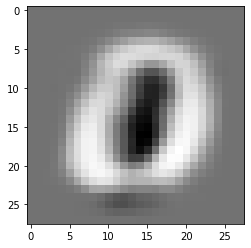

In [9]:
import matplotlib.pyplot as plt

cp = pca.componentesPrincipales()
cp = cp.transpose()
img = cp[0].reshape(28, 28)
plt.imshow(img, cmap="Greys")

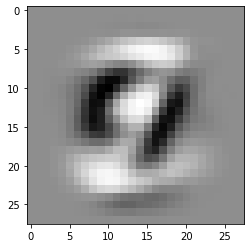

In [10]:
img = cp[1].reshape(28, 28)
plt.imshow(img, cmap="Greys")

#### Es más o menos igual. Aplico kNN.

In [11]:
X_train, y_train = X[2000:], y[2000:]
X_val, y_val = X[:2000], y[:2000]

assert len(X_train) == len(y_train)
assert len(X_val) == len(y_val)

print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")

Ahora tengo 1 instancias de entrenamiento y 2000 de validación


In [12]:
clf = metnum.KNNClassifier(k)
clf.fit(X_train, y_train)

In [13]:
%%time
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_val)

acc = accuracy_score(y_val, y_pred)
print("Accuracy: {}".format(acc))

Accuracy: 0.094
CPU times: user 631 ms, sys: 311 ms, total: 942 ms
Wall time: 2.74 s


### Ahora pruebo con las cantidades de la lista cantImg

In [14]:
from tqdm import tqdm

resultados = []

for i in tqdm(cantImg):
    limite = 2000 + i
    df_red = df_total[:limite]
    X = df_red[df_red.columns[1:]].values
    y = df_red["label"].values.reshape(-1, 1)
    pca = metnum.PCA(alfa)
    X = pca.transform(X)
    
    X_train, y_train = X[2000:], y[2000:]
    X_val, y_val = X[:2000], y[:2000]
    assert len(X_train) == len(y_train)
    assert len(X_val) == len(y_val)
    print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")
    
    clf = metnum.KNNClassifier(k)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    
    resultados.append(acc)

  2%|▏         | 1/41 [00:46<30:41, 46.04s/it]

Ahora tengo 1 instancias de entrenamiento y 2000 de validación
Ahora tengo 1000 instancias de entrenamiento y 2000 de validación


  5%|▍         | 2/41 [01:32<30:01, 46.20s/it]

Ahora tengo 2000 instancias de entrenamiento y 2000 de validación


  7%|▋         | 3/41 [02:18<29:09, 46.05s/it]

Ahora tengo 3000 instancias de entrenamiento y 2000 de validación


 10%|▉         | 4/41 [03:13<30:33, 49.57s/it]

Ahora tengo 4000 instancias de entrenamiento y 2000 de validación


 12%|█▏        | 5/41 [04:00<29:17, 48.82s/it]

Ahora tengo 5000 instancias de entrenamiento y 2000 de validación


 15%|█▍        | 6/41 [04:47<28:07, 48.22s/it]

Ahora tengo 6000 instancias de entrenamiento y 2000 de validación


 17%|█▋        | 7/41 [05:33<26:53, 47.45s/it]

Ahora tengo 7000 instancias de entrenamiento y 2000 de validación


 20%|█▉        | 8/41 [06:21<26:10, 47.59s/it]

Ahora tengo 8000 instancias de entrenamiento y 2000 de validación


 22%|██▏       | 9/41 [07:13<26:08, 49.00s/it]

Ahora tengo 9000 instancias de entrenamiento y 2000 de validación


 24%|██▍       | 10/41 [08:05<25:42, 49.76s/it]

Ahora tengo 10000 instancias de entrenamiento y 2000 de validación


 27%|██▋       | 11/41 [08:55<24:56, 49.90s/it]

Ahora tengo 11000 instancias de entrenamiento y 2000 de validación


 29%|██▉       | 12/41 [09:45<24:06, 49.87s/it]

Ahora tengo 12000 instancias de entrenamiento y 2000 de validación


 32%|███▏      | 13/41 [10:35<23:22, 50.09s/it]

Ahora tengo 13000 instancias de entrenamiento y 2000 de validación


 34%|███▍      | 14/41 [11:33<23:34, 52.38s/it]

Ahora tengo 14000 instancias de entrenamiento y 2000 de validación


 37%|███▋      | 15/41 [12:34<23:49, 54.99s/it]

Ahora tengo 15000 instancias de entrenamiento y 2000 de validación


 39%|███▉      | 16/41 [13:31<23:07, 55.50s/it]

Ahora tengo 16000 instancias de entrenamiento y 2000 de validación


 41%|████▏     | 17/41 [14:21<21:32, 53.85s/it]

Ahora tengo 17000 instancias de entrenamiento y 2000 de validación


 44%|████▍     | 18/41 [15:13<20:30, 53.49s/it]

Ahora tengo 18000 instancias de entrenamiento y 2000 de validación


 46%|████▋     | 19/41 [16:03<19:10, 52.31s/it]

Ahora tengo 19000 instancias de entrenamiento y 2000 de validación


 49%|████▉     | 20/41 [16:55<18:20, 52.38s/it]

Ahora tengo 20000 instancias de entrenamiento y 2000 de validación


 51%|█████     | 21/41 [17:46<17:18, 51.92s/it]

Ahora tengo 21000 instancias de entrenamiento y 2000 de validación


 54%|█████▎    | 22/41 [18:38<16:28, 52.02s/it]

Ahora tengo 22000 instancias de entrenamiento y 2000 de validación


 56%|█████▌    | 23/41 [19:31<15:39, 52.22s/it]

Ahora tengo 23000 instancias de entrenamiento y 2000 de validación


 59%|█████▊    | 24/41 [20:25<14:53, 52.59s/it]

Ahora tengo 24000 instancias de entrenamiento y 2000 de validación


 61%|██████    | 25/41 [21:14<13:47, 51.71s/it]

Ahora tengo 25000 instancias de entrenamiento y 2000 de validación


 63%|██████▎   | 26/41 [22:12<13:21, 53.44s/it]

Ahora tengo 26000 instancias de entrenamiento y 2000 de validación


 66%|██████▌   | 27/41 [23:05<12:29, 53.51s/it]

Ahora tengo 27000 instancias de entrenamiento y 2000 de validación


 68%|██████▊   | 28/41 [24:00<11:39, 53.79s/it]

Ahora tengo 28000 instancias de entrenamiento y 2000 de validación


 71%|███████   | 29/41 [24:56<10:54, 54.51s/it]

Ahora tengo 29000 instancias de entrenamiento y 2000 de validación


 73%|███████▎  | 30/41 [26:17<11:27, 62.49s/it]

Ahora tengo 30000 instancias de entrenamiento y 2000 de validación


 76%|███████▌  | 31/41 [27:16<10:13, 61.34s/it]

Ahora tengo 31000 instancias de entrenamiento y 2000 de validación


 78%|███████▊  | 32/41 [28:12<08:57, 59.71s/it]

Ahora tengo 32000 instancias de entrenamiento y 2000 de validación


 80%|████████  | 33/41 [29:09<07:51, 58.99s/it]

Ahora tengo 33000 instancias de entrenamiento y 2000 de validación


 83%|████████▎ | 34/41 [30:06<06:49, 58.46s/it]

Ahora tengo 34000 instancias de entrenamiento y 2000 de validación


 85%|████████▌ | 35/41 [31:04<05:49, 58.27s/it]

Ahora tengo 35000 instancias de entrenamiento y 2000 de validación


 88%|████████▊ | 36/41 [32:05<04:55, 59.09s/it]

Ahora tengo 36000 instancias de entrenamiento y 2000 de validación


 90%|█████████ | 37/41 [33:05<03:56, 59.22s/it]

Ahora tengo 37000 instancias de entrenamiento y 2000 de validación


 93%|█████████▎| 38/41 [34:05<02:58, 59.62s/it]

Ahora tengo 38000 instancias de entrenamiento y 2000 de validación


 95%|█████████▌| 39/41 [35:06<01:59, 59.89s/it]

Ahora tengo 39000 instancias de entrenamiento y 2000 de validación


 98%|█████████▊| 40/41 [36:06<01:00, 60.04s/it]

Ahora tengo 40000 instancias de entrenamiento y 2000 de validación


100%|██████████| 41/41 [37:08<00:00, 54.35s/it]


In [15]:
resultados

[0.0905,
 0.8985,
 0.924,
 0.9385,
 0.94,
 0.944,
 0.9475,
 0.9535,
 0.957,
 0.9585,
 0.9585,
 0.9605,
 0.962,
 0.963,
 0.9605,
 0.9615,
 0.9635,
 0.9625,
 0.9635,
 0.964,
 0.966,
 0.966,
 0.966,
 0.9665,
 0.9675,
 0.9675,
 0.968,
 0.9665,
 0.968,
 0.9685,
 0.969,
 0.9695,
 0.969,
 0.968,
 0.969,
 0.97,
 0.973,
 0.9725,
 0.973,
 0.974,
 0.9725]

### Agrego algunos resultados más para para cantidades entre 2 y 1000.

In [16]:
cantImg2 = [2,25,50,75]
for i in range(100,1000,100):
    cantImg2.append(i)

In [17]:
cantImg2

[2, 25, 50, 75, 100, 200, 300, 400, 500, 600, 700, 800, 900]

In [18]:
resultados2 = []

for i in tqdm(cantImg2):
    limite = 2000 + i
    df_red = df_total[:limite]
    X = df_red[df_red.columns[1:]].values
    y = df_red["label"].values.reshape(-1, 1)
    pca = metnum.PCA(alfa)
    X = pca.transform(X)
    
    X_train, y_train = X[2000:], y[2000:]
    X_val, y_val = X[:2000], y[:2000]
    assert len(X_train) == len(y_train)
    assert len(X_val) == len(y_val)
    print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")
    
    clf = metnum.KNNClassifier(k)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    
    resultados2.append(acc)

  8%|▊         | 1/13 [00:43<08:46, 43.85s/it]

Ahora tengo 2 instancias de entrenamiento y 2000 de validación


 15%|█▌        | 2/13 [01:27<08:02, 43.85s/it]

Ahora tengo 25 instancias de entrenamiento y 2000 de validación


 23%|██▎       | 3/13 [02:10<07:13, 43.39s/it]

Ahora tengo 50 instancias de entrenamiento y 2000 de validación


 31%|███       | 4/13 [02:53<06:27, 43.10s/it]

Ahora tengo 75 instancias de entrenamiento y 2000 de validación


 38%|███▊      | 5/13 [03:35<05:43, 42.89s/it]

Ahora tengo 100 instancias de entrenamiento y 2000 de validación


 46%|████▌     | 6/13 [04:16<04:55, 42.23s/it]

Ahora tengo 200 instancias de entrenamiento y 2000 de validación


 54%|█████▍    | 7/13 [04:59<04:14, 42.47s/it]

Ahora tengo 300 instancias de entrenamiento y 2000 de validación


 62%|██████▏   | 8/13 [05:43<03:35, 43.04s/it]

Ahora tengo 400 instancias de entrenamiento y 2000 de validación


 69%|██████▉   | 9/13 [06:28<02:54, 43.59s/it]

Ahora tengo 500 instancias de entrenamiento y 2000 de validación


 77%|███████▋  | 10/13 [07:12<02:11, 43.70s/it]

Ahora tengo 600 instancias de entrenamiento y 2000 de validación


 85%|████████▍ | 11/13 [07:55<01:26, 43.42s/it]

Ahora tengo 700 instancias de entrenamiento y 2000 de validación
Ahora tengo 800 instancias de entrenamiento y 2000 de validación


 92%|█████████▏| 12/13 [08:37<00:42, 42.95s/it]

Ahora tengo 900 instancias de entrenamiento y 2000 de validación


100%|██████████| 13/13 [09:20<00:00, 43.13s/it]


In [19]:
resultados2

[0.09,
 0.363,
 0.5255,
 0.615,
 0.671,
 0.7705,
 0.819,
 0.839,
 0.8505,
 0.867,
 0.874,
 0.885,
 0.884]

### Combino los resultados

In [20]:
todosLosResultados = []

In [21]:
todosLosResultados.append(resultados[0])

In [22]:
todosLosResultados = todosLosResultados + resultados2

In [23]:
todosLosResultados

[0.0905,
 0.09,
 0.363,
 0.5255,
 0.615,
 0.671,
 0.7705,
 0.819,
 0.839,
 0.8505,
 0.867,
 0.874,
 0.885,
 0.884]

In [24]:
todosLosResultados = todosLosResultados + resultados[1:]

In [25]:
todosLosResultados

[0.0905,
 0.09,
 0.363,
 0.5255,
 0.615,
 0.671,
 0.7705,
 0.819,
 0.839,
 0.8505,
 0.867,
 0.874,
 0.885,
 0.884,
 0.8985,
 0.924,
 0.9385,
 0.94,
 0.944,
 0.9475,
 0.9535,
 0.957,
 0.9585,
 0.9585,
 0.9605,
 0.962,
 0.963,
 0.9605,
 0.9615,
 0.9635,
 0.9625,
 0.9635,
 0.964,
 0.966,
 0.966,
 0.966,
 0.9665,
 0.9675,
 0.9675,
 0.968,
 0.9665,
 0.968,
 0.9685,
 0.969,
 0.9695,
 0.969,
 0.968,
 0.969,
 0.97,
 0.973,
 0.9725,
 0.973,
 0.974,
 0.9725]

### Ahora grafico esto

In [26]:
cantidades = []

In [27]:
cantidades.append(1)

In [28]:
cantidades

[1]

In [29]:
cantidades = cantidades + cantImg2

In [30]:
cantidades

[1, 2, 25, 50, 75, 100, 200, 300, 400, 500, 600, 700, 800, 900]

In [31]:
cantidades = cantidades + cantImg[1:]

In [32]:
cantidades

[1,
 2,
 25,
 50,
 75,
 100,
 200,
 300,
 400,
 500,
 600,
 700,
 800,
 900,
 1000,
 2000,
 3000,
 4000,
 5000,
 6000,
 7000,
 8000,
 9000,
 10000,
 11000,
 12000,
 13000,
 14000,
 15000,
 16000,
 17000,
 18000,
 19000,
 20000,
 21000,
 22000,
 23000,
 24000,
 25000,
 26000,
 27000,
 28000,
 29000,
 30000,
 31000,
 32000,
 33000,
 34000,
 35000,
 36000,
 37000,
 38000,
 39000,
 40000]

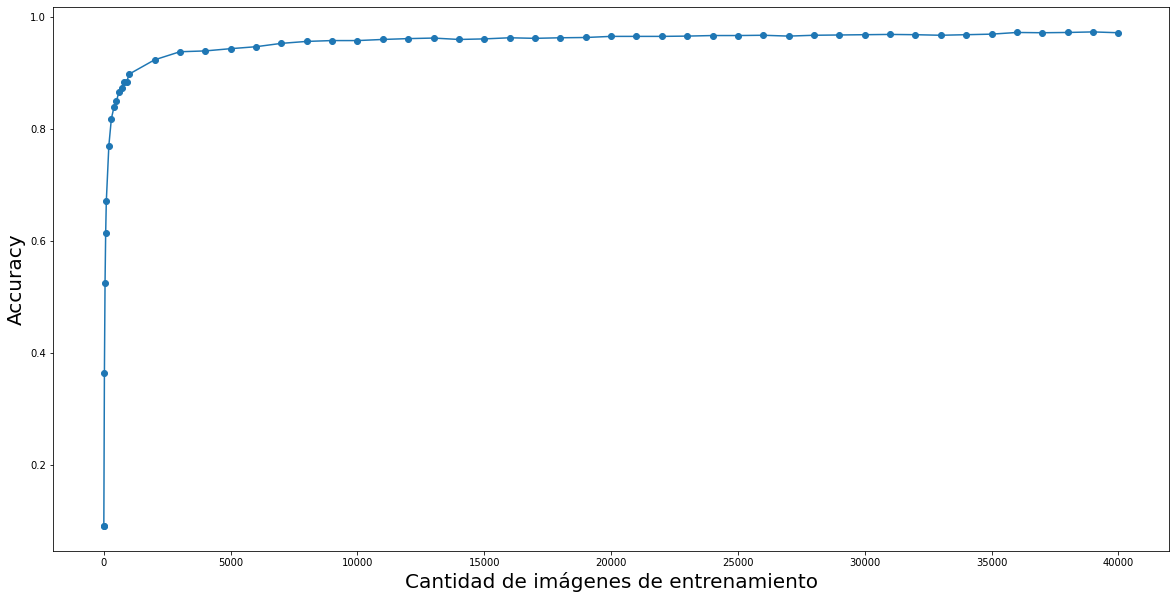

In [34]:
plt.scatter(cantidades,todosLosResultados)
plt.plot(cantidades,todosLosResultados)
plt.rcParams["figure.figsize"] = [20,10]
plt.xlabel('Cantidad de imágenes de entrenamiento', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.savefig("cambio_cant_imagenes.png", bbox_inches='tight')